## MARBL diagnostics, compare Dust and Black Carbon from CESM2 forcing and CESM3 (fully coupled case)


In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cftime
import utils
import pandas as pd
import pop_tools
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from xgcm import Grid
xr.set_options(keep_attrs=True);

### Define cases

In [2]:
case = 'g.e30_b07.GW1850MARBL_JRA.TL319_t232_wgx3_hycom1_N75.007'
case2 = 'b.e30_a08a.B1850C_LTso_MARBL.ne30_t232_wgx3.002'
user1 = 'kristenk'
user2 = 'klindsay'

## Define the year range to examine and get the CESM history files

## Case 1: Post-UCI updates with CESM2 DUST/BC forcing

In [3]:
start_yr = 13
num_years = 4
endyr = start_yr + num_years 

#### first get the 3-D variables

In [4]:
files = []
for year in range(start_yr,endyr):
    yr4="{:04d}".format(year)
    print('doing simulation year', year, '!')
    for month in range(1, 13):
    
        mo2="{:02d}".format(month)
        files.extend(sorted(glob(f'/glade/derecho/scratch/{user1}/archive/{case}/ocn/hist/{case}.mom6.h.bgc.z.{yr4}-{mo2}.nc')))
        #files.extend(sorted(glob(f'/glade/scratch/{user}/{case}/run/{case}.pop.h.{yr4}-{mo2}.nc')))

doing simulation year 13 !
doing simulation year 14 !
doing simulation year 15 !
doing simulation year 16 !


In [5]:
cesm_mon_ds = xr.open_mfdataset(files,decode_times=True,decode_coords=False, concat_dim='time')

#### Now grab the 2-D variables

In [7]:
files = []
for year in range(start_yr,endyr):
    yr4="{:04d}".format(year)
    print('doing simulation year', year, '!')
    for month in range(1, 13):
    
        mo2="{:02d}".format(month)
        files.extend(sorted(glob(f'/glade/derecho/scratch/{user1}/archive/{case}/ocn/hist/{case}.mom6.h.bgc.native.{yr4}-{mo2}.nc')))
        #files.extend(sorted(glob(f'/glade/scratch/{user}/{case}/run/{case}.pop.h.{yr4}-{mo2}.nc')))

doing simulation year 13 !
doing simulation year 14 !
doing simulation year 15 !
doing simulation year 16 !


In [8]:
cesm_mon_ds2 = xr.open_mfdataset(files,decode_times=True,decode_coords=False, concat_dim='time')

### Keep only the variables we need (use this list for both 2-D and 3-D datasets)

In [9]:
variables2d = ['IRON_FLUX','DUST_FLUX','ATM_FINE_DUST_FLUX_CPL','ATM_COARSE_DUST_FLUX_CPL','ATM_BLACK_CARBON_FLUX_CPL'] 

variables3d = ['Fe_scavenge','Fe'] 


coords = {'x':'yh','y':'xh'}

## Run 2: Keith's new fully coupled CESM3 run

In [10]:
start_yr = 13
num_years = 4
endyr = start_yr + num_years 

In [11]:
files = []
for year in range(start_yr,endyr):
    yr4="{:04d}".format(year)
    print('doing simulation year', year, '!')
    for month in range(1, 13):
    
        mo2="{:02d}".format(month)
        files.extend(sorted(glob(f'/glade/derecho/scratch/{user2}/archive/{case2}/ocn/hist/{case2}.mom6.h.bgc.z.{yr4}-{mo2}.nc')))
        #files.extend(sorted(glob(f'/glade/scratch/{user}/{case}/run/{case}.pop.h.{yr4}-{mo2}.nc')))

doing simulation year 13 !
doing simulation year 14 !
doing simulation year 15 !
doing simulation year 16 !


In [12]:
cesm_mon_dsB = xr.open_mfdataset(files,decode_times=True,decode_coords=False, concat_dim='time')

In [13]:
files = []
for year in range(start_yr,endyr):
    yr4="{:04d}".format(year)
    print('doing simulation year', year, '!')
    for month in range(1, 13):
    
        mo2="{:02d}".format(month)
        files.extend(sorted(glob(f'/glade/derecho/scratch/{user2}/archive/{case2}/ocn/hist/{case2}.mom6.h.bgc.native.{yr4}-{mo2}.nc')))
        #files.extend(sorted(glob(f'/glade/scratch/{user}/{case}/run/{case}.pop.h.{yr4}-{mo2}.nc')))

doing simulation year 13 !
doing simulation year 14 !
doing simulation year 15 !
doing simulation year 16 !


In [14]:
cesm_mon_ds2B = xr.open_mfdataset(files,decode_times=True,decode_coords=False, concat_dim='time')

### Drop unnecessary variables

In [15]:
keepthese=['z_l','z_i','time_bounds','time','average_T1', 'average_T2','average_DT'] + variables3d + list(coords.values())
cesm_mon_ds = cesm_mon_ds.drop([v for v in cesm_mon_ds.variables if v not in keepthese])
cesm_mon_dsB = cesm_mon_dsB.drop([v for v in cesm_mon_dsB.variables if v not in keepthese])

In [16]:
keepthese=['z_l','z_i','time_bounds','time','average_T1', 'average_T2','average_DT'] + variables2d + list(coords.values())
cesm_mon_ds2 = cesm_mon_ds2.drop([v for v in cesm_mon_ds2.variables if v not in keepthese])
cesm_mon_ds2B = cesm_mon_ds2B.drop([v for v in cesm_mon_ds2B.variables if v not in keepthese])

### Get the grid data for MOM6

In [17]:
ds_grid = xr.open_dataset(f'/glade/work/kristenk/cesm_work/mom6_static_files/g.e23b16.TL319_t232.GIAFMARBL.001.mom6.h.static.nc')
ds_grid2 = xr.open_dataset(f'/glade/work/kristenk/cesm_work/mom6_static_files/g.e30_b06.GJRAv4.TL319_t232_wgx3_hycom1_N75.2025.081.mom6.h.ocean_geometry.nc')

In [18]:
lons = ds_grid.geolon
lats = ds_grid.geolat
area = ds_grid.areacello #m2
depths = cesm_mon_ds.z_l

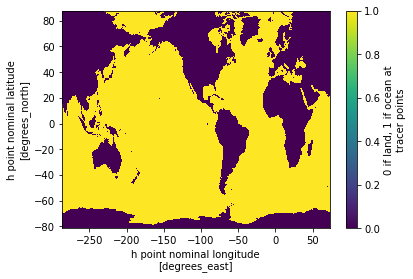

In [19]:
ds_grid.wet.plot()

#### Make my own dz variable

In [20]:
dz = np.zeros([34])

i = 0

for int in cesm_mon_ds.z_i.values[1:35]:
    
    level_up = cesm_mon_ds.z_i.values[i]
    #print(level_up,int)
    dz[i] = int - level_up

    i = i + 1

dz = xr.DataArray(dz,dims=('z_l'))

### spin up a bit of dask

In [21]:
def get_ClusterClient():
    import dask
    from dask_jobqueue import PBSCluster
    from dask.distributed import Client
    cluster = PBSCluster(
        cores=2,
        memory='25 GB',
        processes=1,
        queue='casper',
        resource_spec='select=1:ncpus=1:mem=25GB',
        project='NCGD0011',
        walltime='03:00:00',
        interface='ext',)

    dask.config.set({
        'distributed.dashboard.link':
        'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'
    })
    client = Client(cluster)
    return cluster, client

In [22]:
cluster, client = get_ClusterClient()
cluster.scale(12) 
client

Client Scheduler: tcp://128.117.208.183:36833 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kristenk/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


### Make the annual mean

In [23]:
cesm_ann_ds = cesm_mon_ds.resample({'time':'A'}).mean(dim='time', keep_attrs=True).compute()

In [24]:
cesm_ann_ds2 = cesm_mon_ds2.resample({'time':'A'}).mean(dim='time', keep_attrs=True).compute()

In [25]:
cesm_ann_dsB = cesm_mon_dsB.resample({'time':'A'}).mean(dim='time', keep_attrs=True).compute()

In [26]:
cesm_ann_ds2B = cesm_mon_ds2B.resample({'time':'A'}).mean(dim='time', keep_attrs=True).compute()

In [27]:
cesm_ann_ds2

<xarray.Dataset>
Dimensions:                    (time: 4, xh: 540, yh: 480)
Coordinates:
  * time                       (time) object 0013-12-31 00:00:00 ... 0016-12-...
  * xh                         (xh) float64 -286.7 -286.0 -285.3 ... 72.0 72.67
  * yh                         (yh) float64 -81.56 -81.46 -81.36 ... 87.71 87.74
Data variables:
    ATM_FINE_DUST_FLUX_CPL     (time, yh, xh) float32 nan nan nan ... nan nan
    ATM_COARSE_DUST_FLUX_CPL   (time, yh, xh) float32 nan nan nan ... nan nan
    ATM_BLACK_CARBON_FLUX_CPL  (time, yh, xh) float32 nan nan nan ... nan nan
    DUST_FLUX                  (time, yh, xh) float32 nan nan nan ... nan nan
    IRON_FLUX                  (time, yh, xh) float32 nan nan nan ... nan nan
    average_DT                 (time) timedelta64[ns] 30 days 10:00:00 ... 30...
Attributes:
    NumFilesInSet:     1
    title:             MOM6 diagnostic fields table for CESM case: g.e30_b07....
    associated_files:  areacello: g.e30_b07.GW1850MARBL_JRA.TL319_t232_wgx3_h...
    grid_type:         regular
    grid_tile:         N/A

### Make difference maps



In [28]:
ds_diff2 = cesm_ann_ds2B - cesm_ann_ds2
ds_diff = cesm_ann_dsB - cesm_ann_ds

### Fe flux difference map (kind of hard to interpret)

### Case 1: CESM2 dust/BC forcing + UCI iron updates
### Case 2: CESM3 dust/BC forcing + pre-UCI iron updates

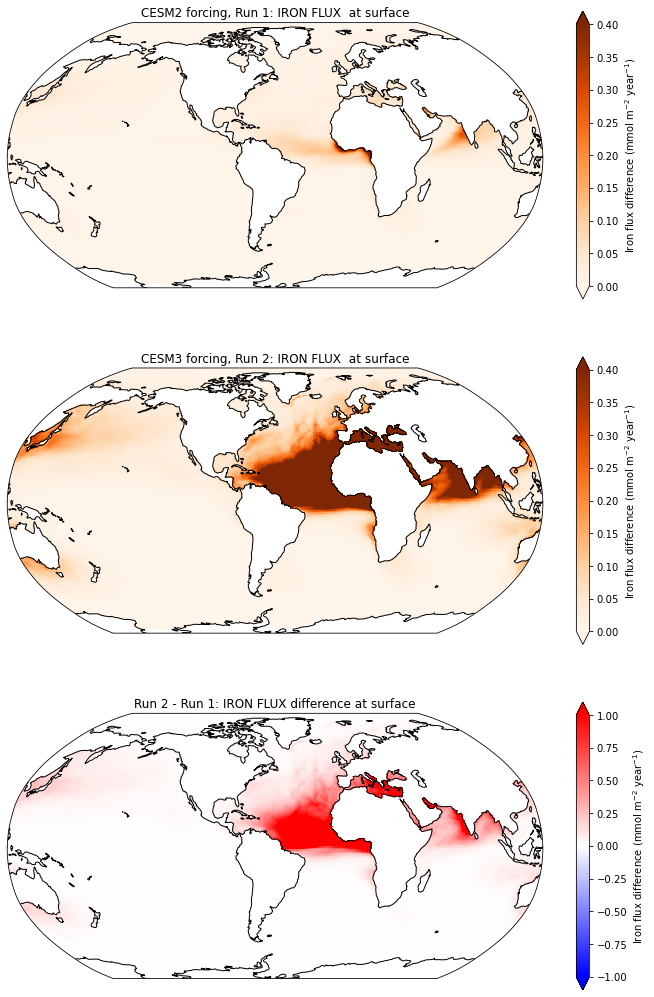

In [47]:
fig = plt.figure(figsize=(12,18))

ax = fig.add_subplot(3,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM2 forcing, Run 1: IRON FLUX  at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds2.IRON_FLUX.mean(dim='time')*86400*365, cmap='Oranges',
                 vmin=0,vmax=0.4,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Iron flux difference (mmol m$^{-2}$ year$^{-1}$)')

ax = fig.add_subplot(3,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM3 forcing, Run 2: IRON FLUX  at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds2B.IRON_FLUX.mean(dim='time')*86400*365, cmap='Oranges',
                 vmin=0,vmax=0.4,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Iron flux difference (mmol m$^{-2}$ year$^{-1}$)')




ax = fig.add_subplot(3,1,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Run 2 - Run 1: IRON FLUX difference at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, ds_diff2.IRON_FLUX.mean(dim='time')*86400*365, cmap='bwr',
                 vmin=-1,vmax=1,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Iron flux difference (mmol m$^{-2}$ year$^{-1}$)')

## Diffence map of total DUST FLUX

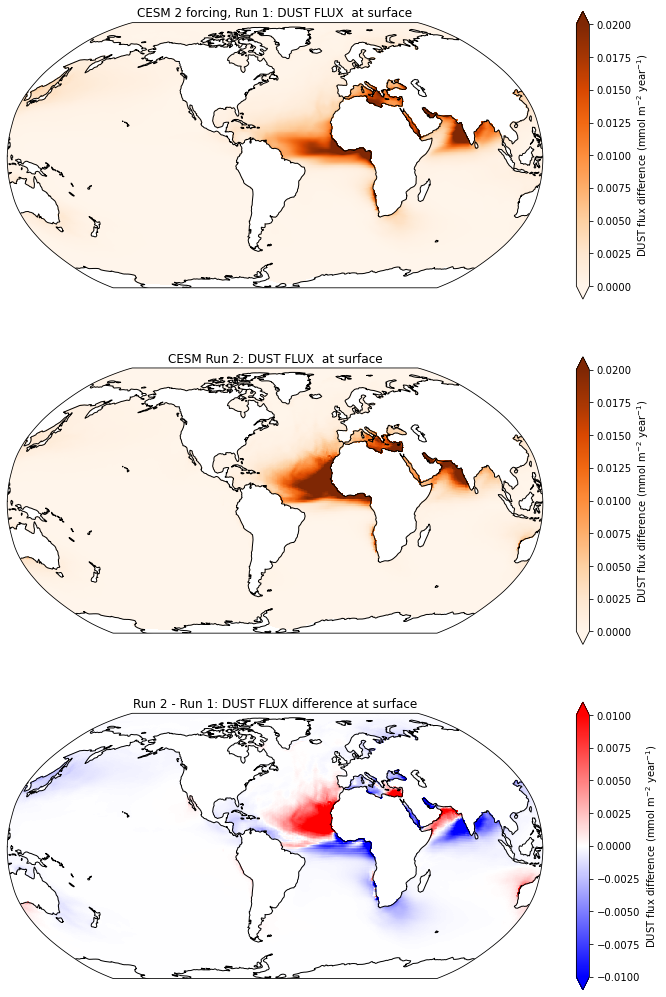

In [48]:
fig = plt.figure(figsize=(12,18))

ax = fig.add_subplot(3,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM 2 forcing, Run 1: DUST FLUX  at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds2.DUST_FLUX.mean(dim='time')*86400*365, cmap='Oranges',
                 vmin=0,vmax=0.02,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='DUST flux difference (mmol m$^{-2}$ year$^{-1}$)')

ax = fig.add_subplot(3,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM Run 2: DUST FLUX  at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds2B.DUST_FLUX.mean(dim='time')*86400*365, cmap='Oranges',
                 vmin=0,vmax=0.02,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='DUST flux difference (mmol m$^{-2}$ year$^{-1}$)')




ax = fig.add_subplot(3,1,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Run 2 - Run 1: DUST FLUX difference at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, ds_diff2.DUST_FLUX.mean(dim='time')*86400*365, cmap='bwr',
                 vmin=-0.01,vmax=0.01,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='DUST flux difference (mmol m$^{-2}$ year$^{-1}$)')

## Diffence map of Coarse DUST FLUX

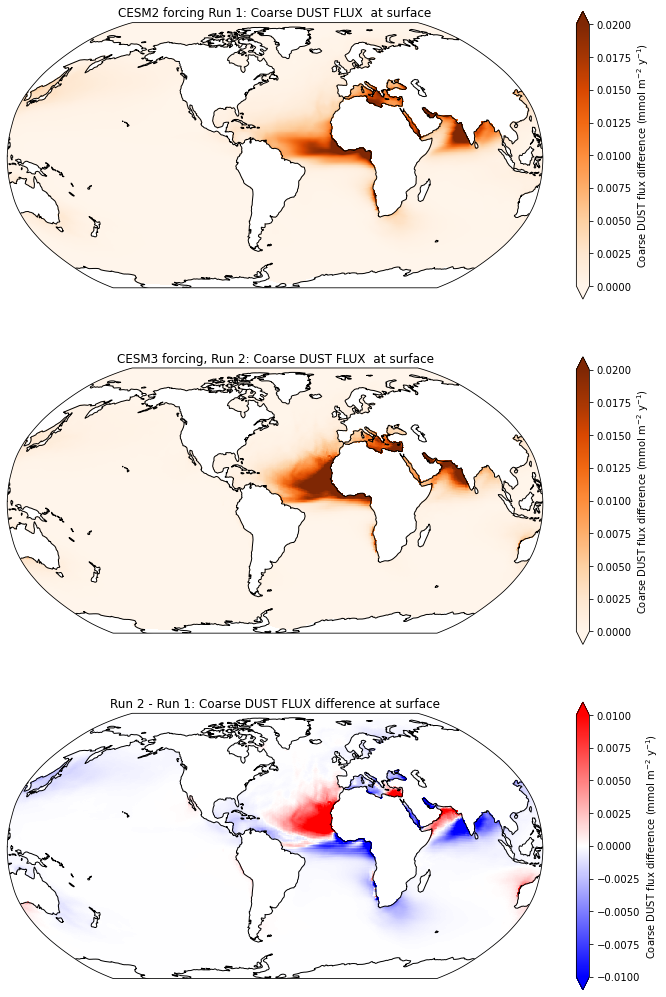

In [49]:
fig = plt.figure(figsize=(12,18))

ax = fig.add_subplot(3,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM2 forcing Run 1: Coarse DUST FLUX  at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds2.ATM_COARSE_DUST_FLUX_CPL.mean(dim='time')*86400*365, cmap='Oranges',
                 vmin=0,vmax=0.02,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Coarse DUST flux difference (mmol m$^{-2}$ y$^{-1}$)')

ax = fig.add_subplot(3,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM3 forcing, Run 2: Coarse DUST FLUX  at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds2B.ATM_COARSE_DUST_FLUX_CPL.mean(dim='time')*86400*365, cmap='Oranges',
                 vmin=0,vmax=0.02,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Coarse DUST flux difference (mmol m$^{-2}$ y$^{-1}$)')




ax = fig.add_subplot(3,1,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Run 2 - Run 1: Coarse DUST FLUX difference at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, ds_diff2.ATM_COARSE_DUST_FLUX_CPL.mean(dim='time')*86400*365, cmap='bwr',
                 vmin=-0.01,vmax=0.01,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Coarse DUST flux difference (mmol m$^{-2}$ y$^{-1}$)')

## Diffence map of fine DUST FLUX

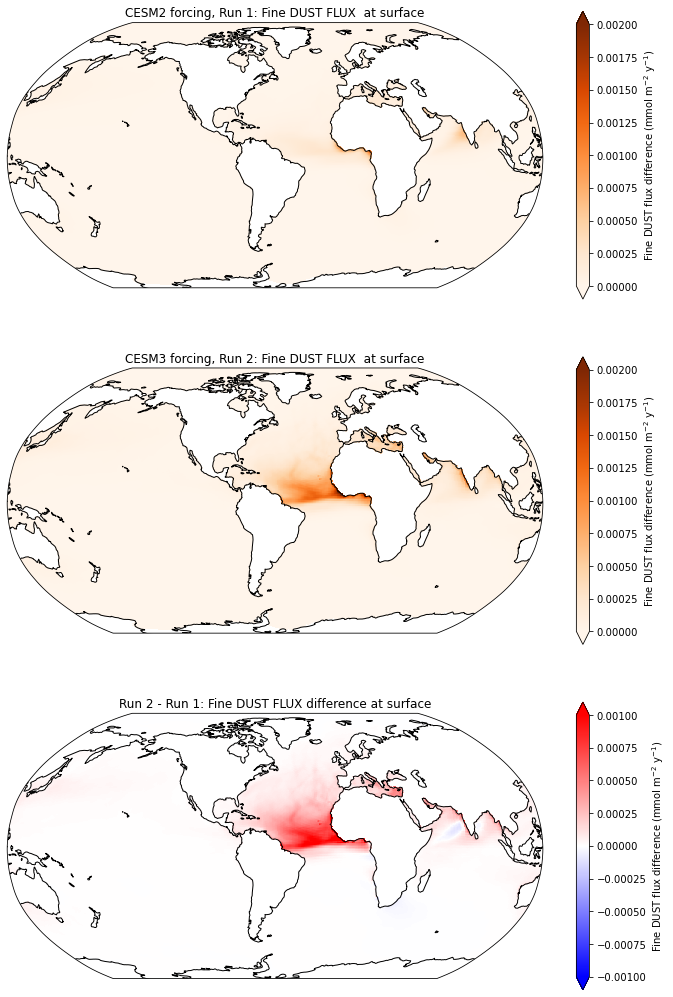

In [81]:
fig = plt.figure(figsize=(12,18))

ax = fig.add_subplot(3,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM2 forcing, Run 1: Fine DUST FLUX  at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds2.ATM_FINE_DUST_FLUX_CPL.mean(dim='time')*86400*365, cmap='Oranges',
                 vmin=0,vmax=0.002,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Fine DUST flux difference (mmol m$^{-2}$ y$^{-1}$)')

ax = fig.add_subplot(3,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM3 forcing, Run 2: Fine DUST FLUX  at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds2B.ATM_FINE_DUST_FLUX_CPL.mean(dim='time')*86400*365, cmap='Oranges',
                 vmin=0,vmax=0.002,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Fine DUST flux difference (mmol m$^{-2}$ y$^{-1}$)')

ax = fig.add_subplot(3,1,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Run 2 - Run 1: Fine DUST FLUX difference at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, ds_diff2.ATM_FINE_DUST_FLUX_CPL.mean(dim='time')*86400*365, cmap='bwr',
                 vmin=-0.001,vmax=0.001,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Fine DUST flux difference (mmol m$^{-2}$ y$^{-1}$)')

## Diffence map of Black carbon FLUX

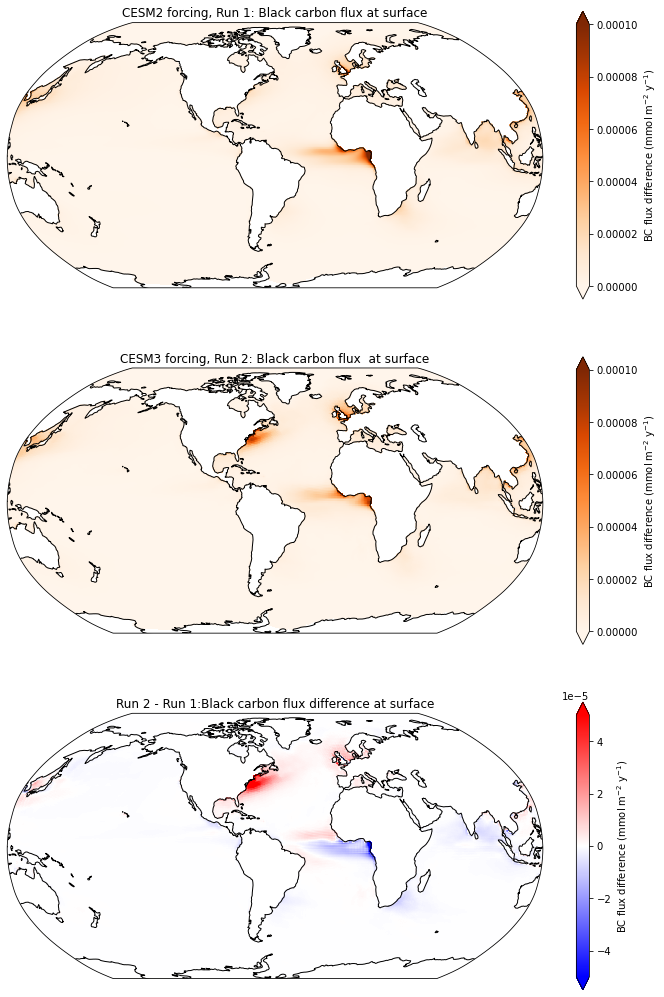

In [82]:
fig = plt.figure(figsize=(12,18))

ax = fig.add_subplot(3,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM2 forcing, Run 1: Black carbon flux at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds2.ATM_BLACK_CARBON_FLUX_CPL.mean(dim='time')*86400*365, cmap='Oranges',
                 vmin=0,vmax=0.0001,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='BC flux difference (mmol m$^{-2}$ y$^{-1}$)')

ax = fig.add_subplot(3,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CESM3 forcing, Run 2: Black carbon flux  at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds2B.ATM_BLACK_CARBON_FLUX_CPL.mean(dim='time')*86400*365, cmap='Oranges',
                 vmin=0,vmax=0.0001,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='BC flux difference (mmol m$^{-2}$ y$^{-1}$)')




ax = fig.add_subplot(3,1,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Run 2 - Run 1:Black carbon flux difference at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, ds_diff2.ATM_BLACK_CARBON_FLUX_CPL.mean(dim='time')*86400*365, cmap='bwr',
                 vmin=-0.00005,vmax=0.00005,
                 transform=ccrs.PlateCarree())
ax.coastlines('110m',linewidth=1)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='BC flux difference (mmol m$^{-2}$ y$^{-1}$)')

## Global metrics

In [83]:
ds_glb = xr.Dataset()
convert = 1e-3 * 365. * 86400. * 1e-9
convert2 = 1e3 * 365. * 86400. * 1e-12

v = 'IRON_FLUX'

ds_glb[v] = ((cesm_ann_ds2[v] * area).sum(dim=('xh', 'yh'))).compute() 
ds_glb[v].attrs = cesm_ann_ds2[v].attrs
ds_glb[v] = ds_glb[v] * convert        
ds_glb[v].attrs['units'] = 'Gmol yr$^{-1}$'


variables = ['DUST_FLUX','ATM_BLACK_CARBON_FLUX_CPL','ATM_COARSE_DUST_FLUX_CPL','ATM_FINE_DUST_FLUX_CPL']

for v in variables:
    ds_glb[v] = ((cesm_ann_ds2[v] * area).sum(dim=('xh', 'yh'))).compute() 
    ds_glb[v].attrs = cesm_ann_ds2[v].attrs
    ds_glb[v] = ds_glb[v] * convert2       
    ds_glb[v].attrs['units'] = 'Tg yr$^{-1}$'

ds_glb = ds_glb.mean(dim='time').compute()

In [84]:
ds_glbB = xr.Dataset()
convert = 1e-3 * 365. * 86400. * 1e-9
convert2 = 1e3 * 365. * 86400. * 1e-12

v = 'IRON_FLUX'

ds_glbB[v] = ((cesm_ann_ds2B[v] * area).sum(dim=('xh', 'yh'))).compute() 
ds_glbB[v].attrs = cesm_ann_ds2B[v].attrs
ds_glbB[v] = ds_glbB[v] * convert        
ds_glbB[v].attrs['units'] = 'Gmol yr$^{-1}$'


variables = ['DUST_FLUX','ATM_BLACK_CARBON_FLUX_CPL','ATM_COARSE_DUST_FLUX_CPL','ATM_FINE_DUST_FLUX_CPL']

for v in variables:
    ds_glbB[v] = ((cesm_ann_ds2B[v] * area).sum(dim=('xh', 'yh'))).compute() 
    ds_glbB[v].attrs = cesm_ann_ds2B[v].attrs
    ds_glbB[v] = ds_glbB[v] * convert2       
    ds_glbB[v].attrs['units'] = 'Tg yr$^{-1}$'
    
ds_glbB = ds_glbB.mean(dim='time').compute()

## Table of Dust and black carbon fluxes (mean over 4 years)

In [85]:
df = pd.DataFrame(columns=['Metric','units','CESM2','CESM3'])


df.loc[0] = ['Total DUST_FLUX',ds_glb.DUST_FLUX.attrs['units'],np.round(ds_glb.DUST_FLUX.values, 2),np.round(ds_glbB.DUST_FLUX.values, 2)]
df.loc[1] = ['Fine DUST_FLUX',ds_glb.ATM_FINE_DUST_FLUX_CPL.attrs['units'],np.round(ds_glb.ATM_FINE_DUST_FLUX_CPL.values, 2),np.round(ds_glbB.ATM_FINE_DUST_FLUX_CPL.values, 2)]
df.loc[2] = ['Coarse DUST_FLUX',ds_glb.ATM_COARSE_DUST_FLUX_CPL.attrs['units'],np.round(ds_glb.ATM_COARSE_DUST_FLUX_CPL.values, 2),np.round(ds_glbB.ATM_COARSE_DUST_FLUX_CPL.values, 2)]
df.loc[3] = ['Black carbon flux',ds_glb.ATM_BLACK_CARBON_FLUX_CPL.attrs['units'],np.round(ds_glb.ATM_BLACK_CARBON_FLUX_CPL.values, 2),np.round(ds_glbB.ATM_BLACK_CARBON_FLUX_CPL.values, 2)]
df

,Metric,units,CESM2,CESM3
0,Total DUST_FLUX,Tg yr$^{-1}$,477.489990,450.010010
1,Fine DUST_FLUX,Tg yr$^{-1}$,6.880000,20.600000
2,Coarse DUST_FLUX,Tg yr$^{-1}$,466.859985,427.589996
3,Black carbon flux,Tg yr$^{-1}$,1.000000,0.980000
